In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [3]:
G= nx.Graph()

In [4]:
G

In [5]:
G.add_node(1)

In [7]:
G.add_nodes_from([2,3,4])

In [8]:
G

In [9]:
G.number_of_nodes()

4

In [10]:
G.number_of_edges()

0

In [11]:
G.nodes()

[1, 2, 3, 4]

In [2]:
main_df= pd.read_json("products_22_03.json")

In [76]:
main_df.columns

Index(['_id', 'affiliate_link', 'category', 'colorAvailable', 'description',
       'imageUrls', 'keyFeature', 'lastUpdate', 'price', 'productBrand',
       'productTitle', 'product_cats', 'product_subcats', 'reco_count',
       'sellingPrice', 'sizeAvailable', 'sourceUrl', 'specKeys', 'specValues',
       'specsDict', 'specsValues', 'styleTip', 'styleTipDetail', 'tagger',
       'tags', 'tags_nobreak', 'washCare'],
      dtype='object')

In [3]:
tags= main_df.loc[:,'tags']

In [4]:
tags=list(tags)

In [5]:
tags=[i for j in tags for i in j]

In [6]:
len(tags)

51567

In [7]:
tags_set= set(tags)

In [8]:
len(tags_set)

820

In [9]:
tags_list=list(tags_set)

In [10]:
tags_graph= nx.Graph()

In [11]:
tags_graph.add_nodes_from(tags_list)

In [12]:
tags_graph.remove_node('')

In [13]:
tags_graph.nodes()

['stylish',
 'front down slit',
 'cut out detailing at yoke',
 'cotton',
 'rib at hem',
 'pleated skirt',
 'BEHAVIOUR: OCCASION: day wear',
 'gathers at hem',
 'BODY SHAPE',
 'sleeveless',
 'linen',
 'asymmetrical hem',
 'asymmetrical sides',
 'mid rise',
 'crochet at neckline',
 'bustline',
 'semi-fitted',
 'puff sleeve',
 'skirts',
 'warm and black',
 'fitted below waist',
 'chain detailing in the front',
 'with a waistband',
 'hide shoulder',
 'halter neck',
 'long jacket',
 'lace detailing',
 'bow detail',
 'jeans',
 'BODY SHAPE: ideal BODY SHAPE: triangle',
 'mandarin neck',
 'art silk',
 'accent bustline',
 'mark> maroon',
 'printed patch pocket',
 'wrap front',
 'printed back',
 'fit and flow',
 'olive green',
 'flaunt back',
 'crepe silk',
 'hide',
 'hide legs',
 'half sleeves',
 'pleated detailing at waist',
 'accent midrift',
 'fleece',
 'short upper torse',
 'striped',
 'bodycon fit',
 'zip at sides',
 'high low dress',
 'double pockets',
 'day wear',
 'skinny',
 'gathers',


In [13]:
tags_list.remove('.')



In [14]:
edge_gen= itertools.combinations(tags_list,2)

In [ ]:
for i in edge_gen:
    print(i)

('', 'stylish')
('', 'gathers at hem')
('', 'front down slit')
('', 'cut out detailing at yoke')
('', 'cotton')
('', 'rib at hem')
('', 'BEHAVIOUR: OCCASION: day wear')
('', 'flaunt back')
('', 'BODY SHAPE')
('', 'sleeveless')
('', 'linen')
('', 'mid rise')
('', 'crochet at neckline')
('', 'bustline')
('', 'semi-fitted')
('', 'puff sleeve')
('', 'skirts')
('', 'warm and black')
('', 'fitted below waist')
('', 'chain detailing in the front')
('', 'with a waistband')
('', 'halter neck')
('', 'long jacket')
('', 'bow detail')
('', 'short upper torso')
('', 'BODY SHAPE: ideal BODY SHAPE: triangle')
('', 'mandarin neck')
('', 'accent bustline')
('', 'keyhole')
('', 'overlay skirt')
('', 'printed patch pocket')
('', 'wrap front')
('', 'printed back')
('', 'blouson')
('', 'olive green')
('', 'slimming effect')
('', 'hide')
('', 'hide legs')
('', 'half sleeves')
('', 'pleated detailing at waist')
('', 'hide tummy')
('', 'accent midrift')
('', 'regular')
('', 'striped')
('', 'bodycon fit')
('',

In [15]:
edge_gen= list(edge_gen)

In [16]:
edge_gen[1]

('', 'tunic')

In [92]:
tags_graph.add_edges_from(edge_gen)

In [ ]:
tags_graph.number_of_edges()

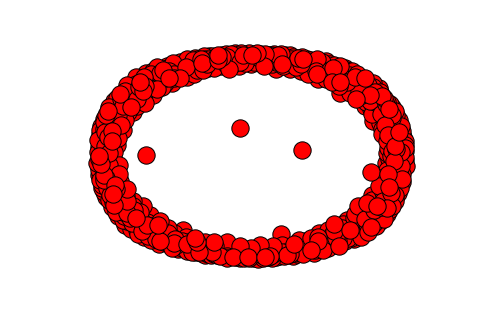

In [17]:
nx.draw(tags_graph)

In [109]:
len(tags_list)

818

In [18]:
m1= pd.DataFrame(index= main_df.index, columns= tags_list)

In [19]:
for i,j in zip(m1.index,main_df.loc[:,'tags']):
        for k in j:
            m1.loc[i,k]=1
            

In [20]:
m1= m1.fillna(0)

In [21]:
cooc= m1.T.dot(m1)

In [22]:
cooc

viscose lycra blend  tunic  \
                                      1                    0      0   
viscose lycra blend                   0                    1      0   
tunic                                 0                    0     95   
concealed button placket              0                    0      0   
BODY SHAPE                            0                    0      0   
cape                                  0                    0      0   
printed neck panel                    0                    0      0   
light color                           0                    0      4   
three fourth sleeve                   0                    0     11   
extreme                               0                    0      1   
wrap front                            0                    0      0   
OTHER: BEHAVIOUR: OCCASION: day wear  0                    0      0   
camisole neckline                     0                    0      0   
beige                                 0                    0      0   
zari                                  0                    0      1   
dressy                                0                    0      7   
gathered at hem                       0                    0      0   
knot detailing                        0                    0      0   
blouson                               0                    0      0   
long curved back hem                  0                    0      1   
dress type churidar kameez dupatta    0                    0      0   
all over prints                       0                    0      0   
slit at the back                      0                    0      0   
slit at center front                  0                    0      3   
white                                 0                    0     10   
work wear                             0                    0      6   
full buttoned                         0                    0      0   
A-line dress.                         0                    0      0   
graphic                               0                    0      5   
halter                                0                    0      0   
...                                  ..                  ...    ...   
embellished bodice                    0                    0      0   
details in neck                       0                    0      0   
accent shape                          0                    0      0   
zip full back                         0                    0      0   
sheer                                 0                    0      1   
cut out detailing                     0                    0      1   
zip at centre front                   0                    0      0   
earthy                                0                    0      0   
over lap style                        0                    0      0   
crew neck                             0                    0      0   
loose fitted                          0                    0      0   
accent midrift                        0                    0      0   
henley neck variations                0                    0      1   
high neckline                         0                    0      0   
off white                             0                    0      1   
slits in front                        0                    0      0   
etrendy                               0                    0      0   
olive green                           0                    0      0   
scuba                                 0                    0      0   
blue colour                           0                    0      0   
hide bustline                         0                    0     12   
closed v neck                         0                    0      0   
basic                                 0                    0      4   
leggings                              0                    0      0   
ribbed                                0                    0     

In [23]:
np.fill_diagonal(cooc.values,0)

In [24]:
cooc

viscose lycra blend  tunic  \
                                      0                    0      0   
viscose lycra blend                   0                    0      0   
tunic                                 0                    0      0   
concealed button placket              0                    0      0   
BODY SHAPE                            0                    0      0   
cape                                  0                    0      0   
printed neck panel                    0                    0      0   
light color                           0                    0      4   
three fourth sleeve                   0                    0     11   
extreme                               0                    0      1   
wrap front                            0                    0      0   
OTHER: BEHAVIOUR: OCCASION: day wear  0                    0      0   
camisole neckline                     0                    0      0   
beige                                 0                    0      0   
zari                                  0                    0      1   
dressy                                0                    0      7   
gathered at hem                       0                    0      0   
knot detailing                        0                    0      0   
blouson                               0                    0      0   
long curved back hem                  0                    0      1   
dress type churidar kameez dupatta    0                    0      0   
all over prints                       0                    0      0   
slit at the back                      0                    0      0   
slit at center front                  0                    0      3   
white                                 0                    0     10   
work wear                             0                    0      6   
full buttoned                         0                    0      0   
A-line dress.                         0                    0      0   
graphic                               0                    0      5   
halter                                0                    0      0   
...                                  ..                  ...    ...   
embellished bodice                    0                    0      0   
details in neck                       0                    0      0   
accent shape                          0                    0      0   
zip full back                         0                    0      0   
sheer                                 0                    0      1   
cut out detailing                     0                    0      1   
zip at centre front                   0                    0      0   
earthy                                0                    0      0   
over lap style                        0                    0      0   
crew neck                             0                    0      0   
loose fitted                          0                    0      0   
accent midrift                        0                    0      0   
henley neck variations                0                    0      1   
high neckline                         0                    0      0   
off white                             0                    0      1   
slits in front                        0                    0      0   
etrendy                               0                    0      0   
olive green                           0                    0      0   
scuba                                 0                    0      0   
blue colour                           0                    0      0   
hide bustline                         0                    0     12   
closed v neck                         0                    0      0   
basic                                 0                    0      4   
leggings                              0                    0      0   
ribbed                                0                    0     

In [39]:
np.max(cooc.values)

988.0

In [40]:
cooc

stylish  gathers at hem  \
                                         0        0               0   
stylish                                  0        0               0   
gathers at hem                           0        0               0   
front down slit                          0        1               0   
cut out detailing at yoke                0        1               0   
cotton                                   0       52               0   
rib at hem                               0        0               0   
BEHAVIOUR: OCCASION: day wear            0        1               0   
flaunt back                              0       43               0   
BODY SHAPE                               0        0               0   
sleeveless                               0      127               0   
linen                                    0        0               0   
mid rise                                 0        0               0   
crochet at neckline                      0        0               0   
bustline                                 0        5               0   
semi-fitted                              0        3               0   
puff sleeve                              0        1               0   
skirts                                   0       56               0   
warm and black                           0        0               0   
fitted below waist                       0        0               0   
chain detailing in the front             0        0               0   
with a waistband                         0        8               0   
halter neck                              0       10               0   
long jacket                              0        5               0   
bow detail                               0        3               0   
short upper torso                        0       17               0   
BODY SHAPE: ideal BODY SHAPE: triangle   0        0               0   
mandarin neck                            0        1               0   
accent bustline                          0       15               0   
keyhole                                  0        2               0   
...                                     ..      ...             ...   
basic                                    0       31               0   
embellished  details                     0        2               0   
slit at front                            0        2               0   
hide midriff                             0      101               0   
BEHAVIOR modern                          0        0               0   
fur detailing on the collar              0        2               0   
capri                                    0        0               0   
BODY TYPE: rounded BODY TYPE: rectangle  0        0               0   
unconventional                           0        5               0   
zig zag                                  0        3               0   
butterfly print                          0        1               0   
black                                    0      131               1   
net overlay details                      0        0               0   
flowy at waist                           0        5               0   
peach                                    0        3               0   
printed sleeves                          0        3               0   
pleats                                   0       15               0   
grey                                     0       10               0   
long                                     0       14               0   
suit                                     0        9               0   
strap at back                            0        1               0   
white                                    0       44               0   
deep neck                                0        1               0   
lace detailing                           0        0               0   
aqua                                     0        2               0 

In [25]:
marginal_counts= pd.Series(cooc.sum(axis=1))

In [26]:
Total_counts= (marginal_counts.sum()/2)

In [27]:
Total_counts

433332.0

In [28]:
def cal_probab(a,b):
    return a/b


In [29]:
def nmi(mut_ab,a_alone,b_alone,total):
#     p_mut_ab= cal_probab(mut_ab)
#     p_a_alone= cal_probab(a_alone)
#     p_b_alone= cal_probab(b_alone)
#     x= np.log(p_a_alone*p_b_alone)
#     y=np.log(p_mut_ab)
#     return ((x/y)  -1)
    return np.log(cal_probab(mut_ab,total)/(cal_probab(a_alone,total)*cal_probab(b_alone,total)))/np.log(1/cal_probab(mut_ab,total))

In [31]:
nmi(cooc.loc['warm color','neckline'], marginal_counts.loc['warm color'], marginal_counts['neckline'],Total_counts)

-0.074461044082308012

In [68]:
#probab_matrix= pd.DataFrame(index= cooc.index, columns= cooc.columns)
NMI_matrix= pd.DataFrame(index= cooc.index, columns= cooc.columns)
for i in cooc.index:
    for j in cooc.columns:
        NMI_matrix.loc[i,j]= nmi(cooc.loc[i,j], marginal_counts[i], marginal_counts[j])

KeyboardInterrupt: 

In [203]:
NMI_matrix

warm color  neckline long top  \
warm color                                     NaN  -0.84511      NaN   
neckline                                  -1.15489       NaN      NaN   
long top                                       NaN       NaN      NaN   
fringes till hem                               NaN       NaN      NaN   
knot detailing                                 NaN       NaN      NaN   
ethnic                                         NaN -0.899594      NaN   
casual gown                                    NaN       NaN      NaN   
pin dot                                        NaN -0.755768      NaN   
neck                                      -1.09056 -0.914041      NaN   
wine                                           NaN       NaN      NaN   
loosely fitted                            -1.07931 -0.915839      NaN   
cut out detailing at waist                     NaN       NaN      NaN   
bone structure xl                              NaN       NaN      NaN   
classic design                                 NaN       NaN      NaN   
zips at waist                                  NaN       NaN      NaN   
pleated detailing at waist                     NaN       NaN      NaN   
flowy below waist                         -1.04442 -0.888354      NaN   
blue colour                                    NaN -0.595556      NaN   
fur detailing on the collar                    NaN       NaN      NaN   
peplum                                         NaN -0.837467      NaN   
low crotch                                     NaN       NaN      NaN   
side slits                                     NaN       NaN      NaN   
embroidered detail                             NaN       NaN      NaN   
printed neck panel                       -0.856326 -0.709707      NaN   
closely spaced prints                          NaN       NaN      NaN   
notch neck                                -1.05279 -0.879972      NaN   
pencil skirt                                   NaN       NaN      NaN   
horizontal design                              NaN       NaN      NaN   
short                                     -1.05155 -0.899569      NaN   
mini length lining                             NaN       NaN      NaN   
...                                            ...       ...      ...   
shoulders                                      NaN       NaN      NaN   
palazzo                                        NaN       NaN      NaN   
printed jacket                           -0.842976       NaN      NaN   
OTHER: SLEEVES: sleeveless: 3/4 sleeves        NaN       NaN      NaN   
embellished  details                           NaN       NaN      NaN   
digital                                        NaN       NaN      NaN   
tied at the hem                                NaN       NaN      NaN   
flared skirt                                   NaN       NaN      NaN   
accent height                              -1.0729 -0.911495      NaN   
midi length                               -1.06838 -0.913286      NaN   
free flowing                              -1.08692 -0.924079      NaN   
roll up sleeves                           -1.03665 -0.872421      NaN   
BEHAVIOR modern                                NaN       NaN      NaN   
monochromatic                                  NaN -0.783363      NaN   
elasticated hem                                NaN -0.791789      NaN   
waist belt                                     NaN       NaN      NaN   
drop shoulder                                  NaN       NaN      NaN   
skinny                                         NaN       NaN      NaN   
concealed button placket                       NaN       NaN      NaN   
halter shoulder                                NaN       NaN      NaN   
gathers at hem                                 NaN       NaN      NaN   
side slit with zip                             NaN       NaN      NaN   
crushed                                        NaN       NaN      NaN   
simplistic               

In [54]:
cooc1= cooc.copy()
cooc1['total']=pd.Series(marginal_counts, index= cooc.index)

In [55]:
cooc1

stylish  gathers at hem  \
                                         0        0               0   
stylish                                  0        0               0   
gathers at hem                           0        0               0   
front down slit                          0        1               0   
cut out detailing at yoke                0        1               0   
cotton                                   0       52               0   
rib at hem                               0        0               0   
BEHAVIOUR: OCCASION: day wear            0        1               0   
flaunt back                              0       43               0   
BODY SHAPE                               0        0               0   
sleeveless                               0      127               0   
linen                                    0        0               0   
mid rise                                 0        0               0   
crochet at neckline                      0        0               0   
bustline                                 0        5               0   
semi-fitted                              0        3               0   
puff sleeve                              0        1               0   
skirts                                   0       56               0   
warm and black                           0        0               0   
fitted below waist                       0        0               0   
chain detailing in the front             0        0               0   
with a waistband                         0        8               0   
halter neck                              0       10               0   
long jacket                              0        5               0   
bow detail                               0        3               0   
short upper torso                        0       17               0   
BODY SHAPE: ideal BODY SHAPE: triangle   0        0               0   
mandarin neck                            0        1               0   
accent bustline                          0       15               0   
keyhole                                  0        2               0   
...                                     ..      ...             ...   
basic                                    0       31               0   
embellished  details                     0        2               0   
slit at front                            0        2               0   
hide midriff                             0      101               0   
BEHAVIOR modern                          0        0               0   
fur detailing on the collar              0        2               0   
capri                                    0        0               0   
BODY TYPE: rounded BODY TYPE: rectangle  0        0               0   
unconventional                           0        5               0   
zig zag                                  0        3               0   
butterfly print                          0        1               0   
black                                    0      131               1   
net overlay details                      0        0               0   
flowy at waist                           0        5               0   
peach                                    0        3               0   
printed sleeves                          0        3               0   
pleats                                   0       15               0   
grey                                     0       10               0   
long                                     0       14               0   
suit                                     0        9               0   
strap at back                            0        1               0   
white                                    0       44               0   
deep neck                                0        1               0   
lace detailing                           0        0               0   
aqua                                     0        2               0 

In [56]:
# def nmi(df):
#     np.log(cal_probab(mut_ab)/(cal_probab(a_alone))*cal_probab(b_alone))/np.log(1/cal_probab(mut_ab))
cooc1= cooc1.apply(lambda x:x/Total_counts)


In [114]:
cooc.loc['basic','cotton']

240.0

In [78]:
NMI_matrix= pd.DataFrame(index= cooc.index, columns= cooc.columns)
for i in cooc.index:
    for j in cooc.columns:
        NMI_matrix.loc[i,j]= nmi(cooc.loc[i,j], marginal_counts[i], marginal_counts[j])

In [84]:
NMI_matrix =NMI_matrix[NMI_matrix>0.001]

In [86]:
NMI_matrix*cooc

stylish gathers at hem  \
                                         NaN         NaN            NaN   
stylish                                  NaN         NaN            NaN   
gathers at hem                           NaN         NaN            NaN   
front down slit                          NaN   0.0387297            NaN   
cut out detailing at yoke                NaN   0.0521629            NaN   
cotton                                   NaN         NaN            NaN   
rib at hem                               NaN         NaN            NaN   
BEHAVIOUR: OCCASION: day wear            NaN   0.0780868            NaN   
flaunt back                              NaN         NaN            NaN   
BODY SHAPE                               NaN         NaN            NaN   
sleeveless                               NaN         NaN            NaN   
linen                                    NaN         NaN            NaN   
mid rise                                 NaN         NaN            NaN   
crochet at neckline                      NaN         NaN            NaN   
bustline                                 NaN         NaN            NaN   
semi-fitted                              NaN         NaN            NaN   
puff sleeve                              NaN         NaN            NaN   
skirts                                   NaN         NaN            NaN   
warm and black                           NaN         NaN            NaN   
fitted below waist                       NaN         NaN            NaN   
chain detailing in the front             NaN         NaN            NaN   
with a waistband                         NaN         NaN            NaN   
halter neck                              NaN    0.158356            NaN   
long jacket                              NaN   0.0806969            NaN   
bow detail                               NaN         NaN            NaN   
short upper torso                        NaN         NaN            NaN   
BODY SHAPE: ideal BODY SHAPE: triangle   NaN         NaN            NaN   
mandarin neck                            NaN         NaN            NaN   
accent bustline                          NaN         NaN            NaN   
keyhole                                  NaN         NaN            NaN   
...                                      ...         ...            ...   
basic                                    NaN         NaN            NaN   
embellished  details                     NaN         NaN            NaN   
slit at front                            NaN    0.149469            NaN   
hide midriff                             NaN         NaN            NaN   
BEHAVIOR modern                          NaN         NaN            NaN   
fur detailing on the collar              NaN    0.182136            NaN   
capri                                    NaN         NaN            NaN   
BODY TYPE: rounded BODY TYPE: rectangle  NaN         NaN            NaN   
unconventional                           NaN  0.00566255            NaN   
zig zag                                  NaN         NaN            NaN   
butterfly print                          NaN   0.0128059            NaN   
black                                    NaN         NaN        0.13286   
net overlay details                      NaN         NaN            NaN   
flowy at waist                           NaN         NaN            NaN   
peach                                    NaN         NaN            NaN   
printed sleeves                          NaN   0.0189986            NaN   
pleats                                   NaN         NaN            NaN   
grey                                     NaN         NaN            NaN   
long                                     NaN         NaN            NaN   
suit                                     NaN    0.152095            NaN   
strap at back                            NaN  0.00646973            NaN   
white                                    NaN         NaN            NaN   

In [126]:
cooc1=cooc.copy()
NMI_matrix= pd.DataFrame(index= cooc1.index, columns= cooc1.columns)
NMI_margin_counts= marginal_counts.copy()
Total_counts= pd.Series(Total_counts, index=marginal_counts)
NMI_Total_counts= Total_counts.copy()



In [128]:
#while cooc1.values.all()<1:
for i in range(10):
    NMI_margin= pd.Series(cooc1.sum(axis=1),index= cooc1.index)
    NMI_Total= NMI_margin.sum()/2
    for i in cooc1.index:
        for j in cooc1.columns:
            NMI_matrix.loc[i,j]= nmi(cooc1.loc[i,j], NMI_margin[i], NMI_margin[j], NMI_Total)
    NMI_matrix =NMI_matrix[NMI_matrix>0.001]
    NMI_matrix= NMI_matrix.fillna(0)
    cooc1= NMI_matrix*cooc1


In [129]:
cooc1= cooc1.fillna(0)


In [130]:
NMI_matrix.values.max()

1.0000000000000002

In [131]:
cooc1.values.max()

4.9796867399465761

In [63]:
edge_list=[]
for i in cooc1.index:
    for j in cooc1.columns:
        if (cooc1.loc[i,j]>0):
            l1= [i,j,cooc1.loc[i,j]]
            edge_list.append(l1)
            

In [95]:
x1= pd.Series(cooc1.loc['tunic'],index= cooc1.index)

In [94]:
tags_graph.add_weighted_edges_from(edge_list)


820

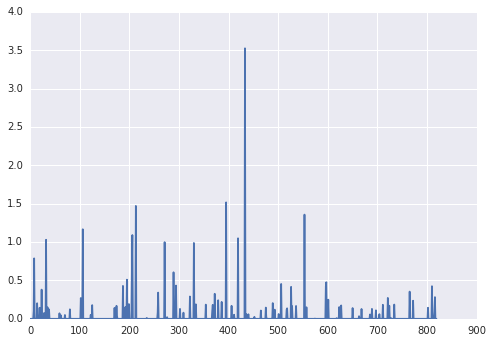

In [96]:
plt.plot(x1.values)

In [73]:
cooc.loc['tunic','embroidered']

8.0

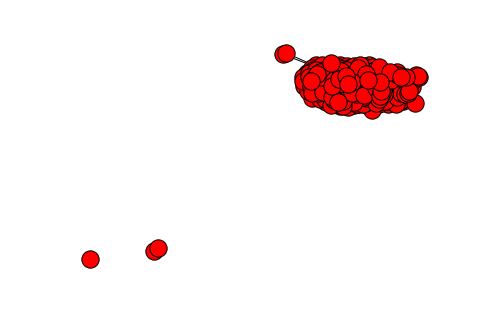

In [69]:
nx.draw(tags_graph)

In [118]:
edge_list

[['', 'COLOURS: blue color', 1.0],
 ['viscose lycra blend', 'sportive', 0.11278279138614981],
 ['viscose lycra blend', 'regular', 0.15559788590745846],
 ['viscose lycra blend', 'stylish', 0.10932622352028272],
 ['viscose lycra blend', 'asymmetrical hem', 0.37148517276152893],
 ['viscose lycra blend', 'dressy day', 0.17330772124821378],
 ['viscose lycra blend', 'sleeveless', 0.12960135446181817],
 ['viscose lycra blend', 'neckline raised', 0.64519006640531662],
 ['viscose lycra blend', 'maxi', 0.23296043661760141],
 ['viscose lycra blend', 'shape', 0.24352585670532756],
 ['viscose lycra blend', 'purple', 0.40130288172669387],
 ['tunic', 'light color', 0.10339175778172222],
 ['tunic', 'three fourth sleeve', 0.78769642370357817],
 ['tunic', 'extreme', 0.0076517614753526531],
 ['tunic', 'zari', 0.20286296149670663],
 ['tunic', 'long curved back hem', 0.14388672755321927],
 ['tunic', 'slit at center front', 0.38053476227188843],
 ['tunic', 'graphic', 0.075888541066503432],
 ['tunic', 'hide 

In [121]:
w1= [i[2] for i in edge_list]

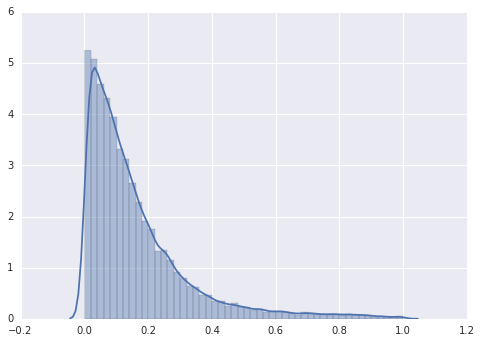

In [124]:
import seaborn as sb
sb.distplot(w1)


In [125]:
max(w1)

1.0